In [1]:
from main import ANF
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from multiprocessing import Pool
from scipy.optimize import curve_fit


sns.set_style("darkgrid")

In [2]:
# countries = ['france']
countries = pd.read_csv('data/density.csv').GEO.values

In [3]:
results = {}

for country in tqdm.tqdm(countries):
    results[country] = ANF(country.lower(), verbose=False, distance=20)

100%|██████████| 36/36 [00:46<00:00,  1.28s/it]


In [4]:
results['Malta']

{'r': 7,
 'k': 128,
 'max_distance': 20,
 'neighbourhoods': [102.0,
  453.4503837321803,
  824.215859253172,
  1189.7452461618864,
  1590.7289129007274,
  2034.6229271146228,
  2483.6507680854525,
  2961.194409446073,
  3463.6632408802857,
  3981.425174181985,
  4525.539327058308,
  5048.5323188410175,
  5561.100926754239,
  6059.258023139035,
  6585.916707581171,
  7055.220898860643,
  7435.281287354596,
  7816.602899518803,
  8156.678047659672,
  8461.206273758256],
 'mean_individual_neighbourhoods': [1.0,
  4.445591997374317,
  8.08054763973698,
  11.664169080018494,
  15.59538149902674,
  19.94728359916297,
  24.349517334171104,
  29.031317739667383,
  33.95748275372829,
  39.03358013903907,
  44.368032618218706,
  49.49541489059821,
  54.520597321119986,
  59.404490422931715,
  64.56781085863894,
  69.16883234177101,
  72.89491458190781,
  76.63336175998826,
  79.96743183980071,
  82.95300268390447],
 'time_in_ms': 20.547585,
 'bitmask_length': 14,
 'nodes': 102,
 'edges': 296}

In [5]:
# Largest and smalles networks
sort = sorted(results.items(), key=lambda x: x[1]['edges'])

def print_network_info(network):
  print(network[0], network[1]['edges'], network[1]['nodes'])

# Print smallest info
print_network_info(sort[0])

# Print largest info
print_network_info(sort[-1])

pingpong = pd.DataFrame.from_dict(results, orient="index").sort_values('edges', ascending=False).reset_index()
pingpong.index += 1
pingpong

print(pingpong[['index', 'nodes', 'edges']].iloc[[0,10,35]].to_latex())

Liechtenstein 36 14
France 190004 64953
\begin{tabular}{llrr}
\toprule
{} &          index &  nodes &   edges \\
\midrule
1  &         France &  64953 &  190004 \\
11 &    Netherlands &   3705 &   10870 \\
36 &  Liechtenstein &     14 &      36 \\
\bottomrule
\end{tabular}



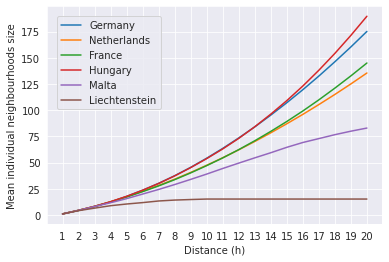

In [86]:
mean_IN = { c: results[c]['mean_individual_neighbourhoods'] for c in results.keys() }
mean_IN_df = pd.DataFrame(mean_IN)
mean_IN_df.index += 1

# fig = plt.figure(figsize=(7,5))
sns.lineplot(data=mean_IN_df[['Germany', 'Netherlands', 'France', 'Hungary', 'Malta', 'Liechtenstein']], dashes=False)
plt.xlabel('Distance (h)')
plt.ylabel('Mean individual neighbourhoods size')
# Put the legend out of the figure
# plt.legend(loc=2, borderaxespad=1.)
# plt.tight_layout()

xint = range(1,21)
plt.xticks(xint)

plt.savefig('images/mean_individual_neighbourhoods.pdf')

In [10]:
# print(results)

# Compute hop exponent for all results
def get_hop_exponent_per_country(results):
  hop_exp = {}
  for c in results.keys():
    hop_exp[c] = get_exponent(results[c]['neighbourhoods'])
  return hop_exp

def get_exponent(neighbourhoods):
  x = np.arange(0, len(neighbourhoods))

  (a, b, c), pcov = curve_fit(func, x, neighbourhoods)
  return b

# Example function to fit to
def func(x, a, b, c):
    return a * x**b + c

exponents = get_hop_exponent_per_country(results)

/tmp/ipykernel_13796/2513724748.py:18: RuntimeWarning: divide by zero encountered in power
  return a * x**b + c


In [63]:
sorted_exp = pd.DataFrame.from_dict(exponents, orient="index", columns=['hop exponent']).sort_values('hop exponent', ascending=False).reset_index().rename(columns={'index': 'country'})
sorted_exp.index += 1

indices = np.arange(0,5)
indices = np.append(indices, [14, -2, -1])

print(sorted_exp.iloc[indices].to_latex())

sorted_exp

\begin{tabular}{llr}
\toprule
{} &        country &  hop exponent \\
\midrule
1  &        Hungary &      1.778460 \\
2  &        Austria &      1.718059 \\
3  &  Great-Britain &      1.706288 \\
4  &     Luxembourg &      1.696478 \\
5  &        Croatia &      1.685870 \\
15 &    Netherlands &      1.445797 \\
35 &        Finland &      0.541242 \\
36 &  Liechtenstein &      0.313347 \\
\bottomrule
\end{tabular}



,country,hop exponent
1,Hungary,1.778460
2,Austria,1.718059
3,Great-Britain,1.706288
4,Luxembourg,1.696478
5,Croatia,1.685870
6,Czech-Republic,1.658850
7,Lithuania,1.619110
8,Germany,1.617385
9,Switzerland,1.592520
10,France,1.568814


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 33 to 35
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GEO                    36 non-null     object 
 1   Density per square km  36 non-null     float64
 2   Hop Exponent           36 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB
None
         GEO  Density per square km  Hop Exponent
33   Albania                   99.1      1.124450
18   Austria                  107.6      1.718059
0    Belgium                  377.3      1.440063
1   Bulgaria                   63.4      1.250905
9    Croatia                   72.8      1.685870


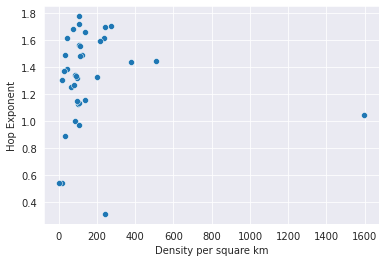

In [58]:
# Find out correlation between population density and mean individual neighbourhood size
df = pd.read_csv('./data/density.csv')
df = df.sort_values('GEO')
df = df.loc[df['GEO'].isin(countries)]

df['Density per square km'] = df['Density per square km'].astype(float)
df['Hop Exponent'] = [v for k, v in sorted(exponents.items(), key=lambda x: x[0])]

print(df.info())
print(df.head())

sns.scatterplot(data=df, x='Density per square km', y='Hop Exponent')
plt.savefig('images/hop_exponent_vs_density.pdf')

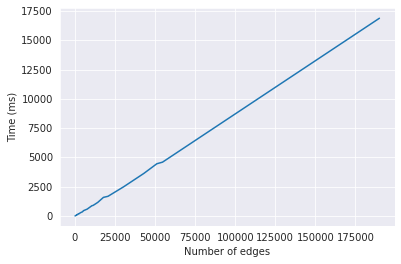

In [57]:
time_results = pd.DataFrame.from_dict(results, orient="index").sort_values('edges', ascending=False).reset_index()

sns.lineplot(data=time_results, x="edges", y="time_in_ms", dashes=False)
plt.xlabel('Number of edges')
plt.ylabel('Time (ms)')

plt.savefig('images/time_vs_edges.pdf')